In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import netCDF4 as nc
import xarray as xr

import pandas as pd
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import matplotlib.pyplot as plt


## Badgery

## station data

In [2]:
df_bd = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/BadgerysCreek_HD01D_Data_067108_HourlyMaxWG.txt")

In [3]:
df_bd = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/BadgerysCreek_HD01D_Data_067108_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [4]:
df1=df_bd[df_bd['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]

df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [5]:
df5=df4.reset_index(drop=True)

In [6]:
test_bd = df5
test_bd["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18

In [7]:
import datetime
test_bd["Time"] = test_bd["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_bd["MM_1"].astype(str) + "-" + test_bd["DD_1"].astype(str) + "T" + test_bd['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_bd["clean_time"] = test_bd["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## Richmond

## station data

In [8]:
df_rich = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/Richmond_HD01D_Data_067105_HourlyMaxWG.txt")

In [9]:
df_rich = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/Richmond_HD01D_Data_067105_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [10]:
df1=df_rich[df_rich['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [11]:
df5=df4.reset_index(drop=True)

In [12]:
len(df5)

18162

In [13]:
test_ri = df5
test_ri["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18

len(test_ri)

18162

In [14]:
import datetime
test_ri["Time"] = test_ri["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_ri["MM_1"].astype(str) + "-" + test_ri["DD_1"].astype(str) + "T" + test_ri['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_ri["clean_time"] = test_ri["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## moree

## station data

In [15]:
df_moree = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/MoreeAirport_HD01D_Data_053115_HourlyMaxWG.txt")

In [16]:
df_moree = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/MoreeAirport_HD01D_Data_053115_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])


In [17]:
df1=df_moree[df_moree['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [18]:
df5=df4.reset_index(drop=True)

In [19]:
test_mo = df5
test_mo["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18


In [20]:
import datetime
test_mo["Time"] = test_mo["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_mo["MM_1"].astype(str) + "-" + test_mo["DD_1"].astype(str) + "T" + test_mo['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_mo["clean_time"] = test_mo["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## syd airport

## station data

In [21]:
df_sy = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/SydneyAirport_HD01D_Data_066037_HourlyMaxWG.txt")

In [22]:
df_sy = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/SydneyAirport_HD01D_Data_066037_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [23]:
df1=df_sy[df_sy['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]


In [24]:
df5=df4.reset_index(drop=True)

In [25]:
test_sy = df5
test_sy["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18


In [26]:
import datetime
test_sy["Time"] = test_sy["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_sy["MM_1"].astype(str) + "-" + test_sy["DD_1"].astype(str) + "T" + test_sy['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_sy["clean_time"] = test_sy["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


## tamworth

## station data

In [27]:
df_tm = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/TamworthAirport_HD01D_Data_055325_HourlyMaxWG.txt")

In [28]:
df_tm = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/TamworthAirport_HD01D_Data_055325_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])


In [29]:
df1=df_tm[df_tm['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [30]:
df5=df4.reset_index(drop=True)

In [31]:
test_tm = df5
test_tm["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18


In [32]:
import datetime
test_tm["Time"] = test_tm["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_tm["MM_1"].astype(str) + "-" + test_tm["DD_1"].astype(str) + "T" + test_tm['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_tm["clean_time"] = test_tm["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

## wagga

In [33]:
## station data

In [34]:
df_wa = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/WaggaWagga_HD01D_Data_072150_HourlyMaxWG.txt")


In [35]:
df_wa = pd.read_table("/g/data/up6/gs5098/ERA5 indices time series/DP and HrMax txt files/WaggaWagga_HD01D_Data_072150_HourlyMaxWG.txt", usecols=[
            "YearMonthDayHourMinutesInYYYY",
            "MM_1",
            "DD_1",
            "HH24_1",
            "MIFormatInUniversalCoordinatedTime",
            #"MM",
            #"DD",
            "HH24",
            "MIFormatInLocalStandardTime",
            "MaxHourlyGustInKm_h"])

In [36]:
df1=df_wa[df_wa['YearMonthDayHourMinutesInYYYY']>=2001]
df2=df1[df1['YearMonthDayHourMinutesInYYYY']<=2019]


df3=df2[df2['MM_1'].isin([1,2,11,12])]
df4=df3[df3['HH24_1'].isin([1,2,3,4,5,6,7,8])]

In [37]:
df5=df4.reset_index(drop=True)

In [38]:
test_wa = df5
test_wa["MaxHourlyGustInm_s"] = df5['MaxHourlyGustInKm_h']* 5/18



In [39]:
import datetime
test_wa["Time"] = test_wa["YearMonthDayHourMinutesInYYYY"].astype(str) + "-" + test_wa["MM_1"].astype(str) + "-" + test_wa["DD_1"].astype(str) + "T" + test_wa['HH24_1'].astype(str) +":"+ "00"+":"+ "00"
test_wa["clean_time"] = test_wa["Time"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))


## Loading diagnostics datasets

In [40]:
richmond_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Richmond/ric_dig.nc')
sydney_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Sydney/syd_dig.nc')
badgery_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Badgery/bad_dig.nc')
wagga_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Wagga/wag_dig.nc')
moree_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Moree/mor_dig.nc')
tamworth_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Tamworth/tam_dig.nc')

In [41]:
richmond_data = richmond_data_1.sel(lat = -33.60, lon = 150.78, method = 'nearest')
sydney_data = sydney_data_1.sel(lat =  -33.95, lon = 151.17, method = 'nearest')
badgery_data = badgery_data_1.sel(lat =  -33.90, lon = 150.73, method = 'nearest')
wagga_data = wagga_data_1.sel(lat =  -35.16, lon = 147.46, method = 'nearest')
moree_data = moree_data_1.sel(lat =  -29.49, lon = 149.85, method = 'nearest')
tamworth_data = tamworth_data_1.sel(lat =  -31.07, lon = 150.84, method = 'nearest')

In [42]:
variable_names = list(richmond_data.variables.keys())

# Display the array of variable names
print(variable_names)


['time', 'lon', 'lat', 'ml_cape', 'mu_cape', 'sb_cape', 'ml_cin', 'sb_cin', 'mu_cin', 'ml_lcl', 'mu_lcl', 'sb_lcl', 'eff_cape', 'eff_cin', 'eff_lcl', 'lr01', 'lr03', 'lr13', 'lr36', 'lr24', 'lr_freezing', 'lr_subcloud', 'lr700_500', 'qmean01', 'qmean03', 'qmean06', 'muq', 'ta500', 'ta850', 'dp850', 'qmean0500', 'q2m', 'qmeansubcloud', 'q_melting', 'q1', 'q3', 'q6', 'rhmin01', 'rhmin03', 'rhmin13', 'rhmean01', 'rhminsubcloud', 'tei', 'wbz', 'mhgt', 'mu_el', 'ml_el', 'sb_el', 'eff_el', 'pwat', 'v_totals', 'c_totals', 't_totals', 'te_diff', 'dpd850', 'dpd700', 'dcape', 'ddraft_temp', 'sfc_thetae', 'srhe_left', 'srh01_left', 'srh03_left', 'srh06_left', 'ebwd', 's010', 's06', 's03', 's01', 's13', 's36', 'scld', 'U500', 'U10', 'U1', 'U3', 'U6', 'Ust_left', 'Usr01_left', 'Usr03_left', 'Usr06_left', 'Uwindinf', 'Umeanwindinf', 'Umean800_600', 'Umean06', 'Umean01', 'Umean03', 'wg10', 'dcp', 'stp_cin_left', 'stp_fixed_left', 'scp', 'scp_fixed', 'ship', 'mlcape*s06', 'mucape*s06', 'sbcape*s06', '

In [43]:
variable_names = ['time','ml_cape', 'mu_cape', 'eff_cape', 'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 'mlcape*s06',  'ebwd',  's06',  'Umean800_600', 
                  'Umean06', 'wg10', 'dcp', 'scp',   'gustex', 'eff_sherb', 'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900' ]

In [44]:
df_wa = pd.DataFrame({var_name: wagga_data[var_name] for var_name in variable_names})
df_sy = pd.DataFrame({var_name: sydney_data[var_name] for var_name in variable_names})
df_mo = pd.DataFrame({var_name: moree_data[var_name] for var_name in variable_names})
df_tm = pd.DataFrame({var_name: tamworth_data[var_name] for var_name in variable_names})
df_bd = pd.DataFrame({var_name: badgery_data[var_name] for var_name in variable_names})
df_ri = pd.DataFrame({var_name: richmond_data[var_name] for var_name in variable_names})

In [45]:
new_frame_wa = test_wa.merge(df_wa,how='left', left_on='clean_time', right_on='time')
new_frame_wa_nad = new_frame_wa.dropna()

new_frame_sy = test_sy.merge(df_sy,how='left', left_on='clean_time', right_on='time')
new_frame_sy_nad = new_frame_sy.dropna()

new_frame_mo = test_mo.merge(df_mo,how='left', left_on='clean_time', right_on='time')
new_frame_mo_nad = new_frame_mo.dropna()

new_frame_tm = test_tm.merge(df_tm,how='left', left_on='clean_time', right_on='time')
new_frame_tm_nad = new_frame_tm.dropna()

new_frame_bd = test_bd.merge(df_bd,how='left', left_on='clean_time', right_on='time')
new_frame_bd_nad = new_frame_bd.dropna()

new_frame_ri = test_ri.merge(df_ri,how='left', left_on='clean_time', right_on='time')
new_frame_ri_nad = new_frame_ri.dropna()

In [46]:
# Merge DataFrames by column
dt_merged_df = pd.concat([new_frame_wa_nad, new_frame_sy_nad, new_frame_mo_nad,
                      new_frame_tm_nad, new_frame_bd_nad, new_frame_ri_nad], ignore_index = True)
#dt_merged_df

In [47]:
column_names = dt_merged_df.columns.tolist()

# Join the column names with commas
column_names_str = ', '.join(column_names)

# Print the column names
print("Column Names:", column_names_str)

Column Names: YearMonthDayHourMinutesInYYYY, MM_1, DD_1, HH24_1, MIFormatInUniversalCoordinatedTime, HH24, MIFormatInLocalStandardTime, MaxHourlyGustInKm_h, MaxHourlyGustInm_s, Time, clean_time, time, ml_cape, mu_cape, eff_cape, lr13, qmean01, rhmin03, ml_el, t_totals, dcape, q_melting, mlcape*s06, ebwd, s06, Umean800_600, Umean06, wg10, dcp, scp, gustex, eff_sherb, k_index, bdsd, inverted_v, ta900, rh900


In [48]:
# Extract the needed columns
selected_columns = ['MaxHourlyGustInm_s', 'mu_cape', 'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting',  's06',  'Umean800_600', 
                  'Umean06', 'wg10', 'dcp',  'gustex', 'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900' ]

# Create a new dataframe with only the selected columns
data_df = dt_merged_df.loc[:, selected_columns]

# Display the new dataframe
#data_df

### Multiplying rel hums with -1

In [49]:
columns_to_multiply = ['rhmin03', 'rh900']

# Create a new DataFrame with the selected columns multiplied by -1
new_df = data_df.copy()  # Create a copy of the original DataFrame
#new_df[columns_to_multiply] *= -1  # Multiply the selected columns by -1

# Optionally, you can also rename the columns if needed
# new_df.rename(columns={'column1': 'new_column1', 'column2': 'new_column2', 'column3': 'new_column3'}, inplace=True)

# Print the new DataFrame
new_df

,MaxHourlyGustInm_s,mu_cape,lr13,qmean01,rhmin03,ml_el,t_totals,dcape,q_melting,s06,Umean800_600,Umean06,wg10,dcp,gustex,k_index,bdsd,inverted_v,ta900,rh900
0,9.805556,0.0000,6.380859,5.409180,22.750977,2610.1250,39.312500,523.8750,2.236328,3.093750,2.546875,2.046875,11.375,0.000000,24.593750,16.567383,0.007812,3.226060,17.100006,37.500000
1,5.694444,0.0000,6.745117,5.341797,20.844727,2777.7500,40.488281,558.3125,1.881836,3.406250,2.132812,2.093750,10.625,0.000000,24.956055,15.728516,0.015625,-0.202211,18.350006,35.250000
2,6.694444,0.0000,6.983398,5.132812,18.839844,2973.7500,42.206055,737.1875,1.564453,3.648438,2.078125,2.179688,9.250,0.000000,25.207031,14.804688,0.015625,-3.170978,19.350006,31.875000
3,6.694444,0.0000,7.273438,5.789062,20.088867,2919.7500,45.108398,1095.3125,1.275391,6.742188,3.757812,3.000000,6.875,0.000000,28.668945,13.415039,0.031250,-8.009457,20.475006,33.374996
4,6.694444,0.0000,7.443359,5.600586,18.624023,3074.8750,45.863281,1164.5000,1.142578,6.468750,4.164062,3.226562,6.375,0.000000,28.149414,12.267578,0.031250,-7.650257,21.350006,30.624994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89292,8.194444,337.2500,6.449219,9.692383,41.548828,3373.1250,46.519531,828.6250,1.440430,3.437500,4.007812,3.640625,8.250,0.021056,30.680664,17.483398,0.117188,-26.152306,16.975006,69.000000
89293,7.694444,125.5625,6.580078,9.172852,39.207031,1870.7500,46.123047,844.8750,1.408203,3.406250,4.414062,3.328125,8.125,0.007254,29.593750,16.403320,0.132812,-24.793045,17.225006,64.750000
89294,9.305556,286.1250,6.343750,9.643555,41.767578,6240.7500,47.552734,876.6250,1.421875,2.531250,4.023438,3.726562,8.750,0.014283,29.818359,15.990234,0.093750,-24.856346,17.225006,67.625008
89295,8.694444,650.3125,5.879883,11.315430,53.918945,9075.1875,48.078125,851.6250,1.494141,1.875000,4.812500,3.976562,11.250,0.024860,28.459961,15.748047,0.039062,-24.960602,16.600006,76.250000


In [50]:
new_column_names = ['station_speed', 'mu_cape',  'lapserate1_3',
       'qmean01', 'rhmin03', 'ml_el', 't_totals', 'dcape', 'q_melting',
      's06', 'Umean800_600', 'Umean06', 'barra_wind', 'dcp',
        'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900',
       'rh900']

# Assign the new column names to the DataFrame:
new_df.columns = new_column_names
new_df

,station_speed,mu_cape,lapserate1_3,qmean01,rhmin03,ml_el,t_totals,dcape,q_melting,s06,Umean800_600,Umean06,barra_wind,dcp,gustex,k_index,bdsd,inverted_v,ta900,rh900
0,9.805556,0.0000,6.380859,5.409180,22.750977,2610.1250,39.312500,523.8750,2.236328,3.093750,2.546875,2.046875,11.375,0.000000,24.593750,16.567383,0.007812,3.226060,17.100006,37.500000
1,5.694444,0.0000,6.745117,5.341797,20.844727,2777.7500,40.488281,558.3125,1.881836,3.406250,2.132812,2.093750,10.625,0.000000,24.956055,15.728516,0.015625,-0.202211,18.350006,35.250000
2,6.694444,0.0000,6.983398,5.132812,18.839844,2973.7500,42.206055,737.1875,1.564453,3.648438,2.078125,2.179688,9.250,0.000000,25.207031,14.804688,0.015625,-3.170978,19.350006,31.875000
3,6.694444,0.0000,7.273438,5.789062,20.088867,2919.7500,45.108398,1095.3125,1.275391,6.742188,3.757812,3.000000,6.875,0.000000,28.668945,13.415039,0.031250,-8.009457,20.475006,33.374996
4,6.694444,0.0000,7.443359,5.600586,18.624023,3074.8750,45.863281,1164.5000,1.142578,6.468750,4.164062,3.226562,6.375,0.000000,28.149414,12.267578,0.031250,-7.650257,21.350006,30.624994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89292,8.194444,337.2500,6.449219,9.692383,41.548828,3373.1250,46.519531,828.6250,1.440430,3.437500,4.007812,3.640625,8.250,0.021056,30.680664,17.483398,0.117188,-26.152306,16.975006,69.000000
89293,7.694444,125.5625,6.580078,9.172852,39.207031,1870.7500,46.123047,844.8750,1.408203,3.406250,4.414062,3.328125,8.125,0.007254,29.593750,16.403320,0.132812,-24.793045,17.225006,64.750000
89294,9.305556,286.1250,6.343750,9.643555,41.767578,6240.7500,47.552734,876.6250,1.421875,2.531250,4.023438,3.726562,8.750,0.014283,29.818359,15.990234,0.093750,-24.856346,17.225006,67.625008
89295,8.694444,650.3125,5.879883,11.315430,53.918945,9075.1875,48.078125,851.6250,1.494141,1.875000,4.812500,3.976562,11.250,0.024860,28.459961,15.748047,0.039062,-24.960602,16.600006,76.250000


In [51]:
# new_df.drop(columns=['wg10'], inplace=True)
# new_df

## Random Forest

In [52]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Data

import numpy as np
import pandas as pd

# Plotting

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Jupyter lab widgets

import ipywidgets as widgets
from IPython.display import display

# Scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [53]:
# Define a function to apply your condition
def modify_column_value(x):
    if x >= 18:
        return 1
    else:
        return 0

# Apply the function to the column
new_df['station_speed'] = new_df['station_speed'].apply(lambda x: modify_column_value(x))

In [54]:
# file_path = "/g/data/up6/gs5098/BARRA_indices_time_series/new_df.csv"

# # Save the DataFrame to a CSV file
# new_df.to_csv(file_path, index=False)  # Set index=False if you don't want to write row indices


In [55]:
#new_df = pd.read_csv("/g/data/up6/gs5098/BARRA_indices_time_series/new_df.csv")

In [56]:
#new_df[new_df['MaxHourlyGustInm_s']==1]

In [57]:
#split dataset in features and target variable
feature_cols = ['mu_cape',  'lapserate1_3', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 's06',  'Umean800_600', 
                  'Umean06','barra_wind','dcp',  'gustex',  'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900']

#feature_cols = ['wg10']
target_cols = ['station_speed']

X = new_df[feature_cols] # Features
y = new_df[target_cols] # Target variable


### Checking if the original dataset is balanced or not

In [ ]:

# Display the first 3 lines
print("predictors: \n",X.head(3))


# Display the first 3 lines
print("\n\ntarget: \n", y.head(3))

# Count the number of occurrences of each class in the target variable
class_counts = y.value_counts()

# Calculate the proportions of each class
class_proportions = class_counts / len(y)

# Display class counts and proportions
print("Class counts:\n", class_counts)
print("\nClass proportions:\n", class_proportions)

# Check if the dataset is balanced
balanced_threshold = 0.1  # Define a threshold for class imbalance (e.g., 0.1 for 10%)
is_balanced = np.all(np.abs(class_proportions - 0.5) <= balanced_threshold)

if is_balanced:
    print("\nThe dataset is balanced.")
else:
    print("\nThe dataset is imbalanced.")

### Class weight calculation

In [58]:
# Assuming 'target_cols' is the name of the column containing the class labels
target_cols = 'MaxHourlyGustInm_s'  # Replace 'class_label' with the actual column name

# Extracting unique classes from the specified column
unique_classes = new_df[target_cols].unique()

# Dictionary to store the calculated weights
out_dict = {}

# Calculate the weights for each class
for classes in unique_classes:
    class_count = new_df[new_df[target_cols] == classes].shape[0]
    out_dict[classes] = new_df.shape[0] / (class_count * len(unique_classes))

out_dict


{0: 0.5064255251576607, 1: 39.40732568402471}

### Splitting the data into train and test sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print(X_train.shape, y_train.shape)

(62507, 19) (62507, 1)


In [60]:
print(X_test.shape, y_test.shape)

(26790, 19) (26790, 1)


### Hyperparameter tuning

In [252]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1,
                             bootstrap=True,  class_weight= 'balanced')

params = {
    'max_samples': [0.3,0.4, 0.5, 0.7],
    'n_estimators': [50,100,200],
    'criterion': ['entropy','gini'],
    'max_depth': [4,5]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="precision")


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [4, 5],
                         'max_samples': [0.3, 0.4, 0.5, 0.7],
                         'n_estimators': [50, 100, 200]},
             scoring='precision', verbose=1)

In [255]:
# Best model result
best_rf_model = grid_search.best_estimator_

# Best score achieved
best_score = grid_search.best_score_

# Print or use the best model or score as needed
print("Best model parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", best_score)

Best model parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_samples': 0.3, 'n_estimators': 200}
Best cross-validation accuracy: 0.1285179928681914


In [256]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_samples': 0.3, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.1285179928681914


### Training a RF and Predicting on test data using train model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#weights = {0: 1, 1: 20}

clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', 
                             class_weight= 'balanced', 
                             random_state=42, max_depth = 4, n_jobs = -1)

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions
predictions = clf.predict(X_test)

# Evaluating the model
print(classification_report(y_test, predictions))


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      0.89      0.94     26476
           1       0.08      0.83      0.15       314

    accuracy                           0.89     26790
   macro avg       0.54      0.86      0.55     26790
weighted avg       0.99      0.89      0.93     26790



In [62]:
# # Obtain the OOB error 
# oob_error = 1 - clf.oob_score_ 
  
# # Print the OOB error 
# print(f'OOB error: {oob_error:.3f}') 

In [63]:
#clf.oob_score_

In [64]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

#Ploting the cunfusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[23628,  2848],
       [   52,   262]])

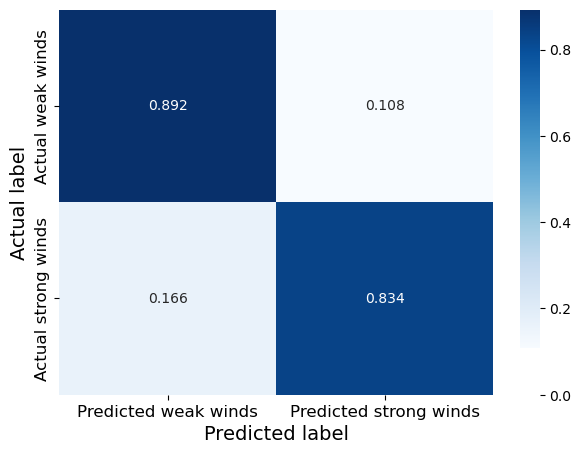

In [65]:
# Step 2: Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 3: Plotting the normalized confusion matrix
plt.figure(figsize=(7, 5))
sns_heatmap = sns.heatmap(cm_normalized, annot=True, fmt=".3f", cmap='Blues', 
            xticklabels=['Predicted weak winds', 'Predicted strong winds'], 
            yticklabels=['Actual weak winds', 'Actual strong winds'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = sns_heatmap.collections[0].colorbar
cbar.set_ticks(np.arange(0, 1, 0.2))
cbar.set_ticklabels([f"{x:.1f}" for x in np.arange(0, 1, 0.2)], 
                    fontsize=10)  # Setting font size for colorbar ticks
plt.ylabel('Actual label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
#plt.title('Normalized Confusion Matrix')
plt.show()

In [66]:
TN = cm[0, 0] 
FP = cm[0, 1] 
FN = cm[1, 0] 
TP = cm[1, 1] 

In [67]:
FPR = FP / (FP + TN)
FPR

0.10756911920229642

### Predicting on test data

In [68]:
# Predict on test data
y_pred = clf.predict(X_test)

# Display y_pred array
#print("Predicted classes for the test data:\n", y_pred)

# Calculate the number of droughts and non-droughts in y_pred
strongwind_count = np.sum(y_pred == 1)
weakwind_count = np.sum(y_pred == 0)

print(f"\nNumber of predicted strongwinds: {strongwind_count}")
print(f"Number of predicted weakwinds: {weakwind_count}")


Number of predicted strongwinds: 3110
Number of predicted weakwinds: 23680


In [69]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Accuracy: 0.8918
Precision: 0.0842
Recall: 0.8344
F1-score: 0.1530
Balanced Accuracy: 0.8634


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
rf_predictions = clf.predict(X_test)

# Probabilities for ROC-AUC
rf_probs = clf.predict_proba(X_test)[:, 1]

# Metrics
print("Random Forest Metrics:")
print("ROC-AUC:", roc_auc_score(y_test, rf_probs))



Random Forest Metrics:
ROC-AUC: 0.9336799918782351


## Feat importance

In [70]:
##Compute and store feat importance score over 50 random train-test test splits. 


n_iterations = 50
variable_importance = np.zeros((len(X.columns), n_iterations))

seeds= np.arange(n_iterations)
for i, seed in enumerate(seeds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', class_weight = 'balanced',
                              max_depth = 3,
                             random_state=seed, n_jobs = -1)
    clf.fit(X_train,y_train)

    variable_importance[:,i]=clf.feature_importances_
variable_importance_df = pd.DataFrame(variable_importance.T, columns=X.columns)   

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


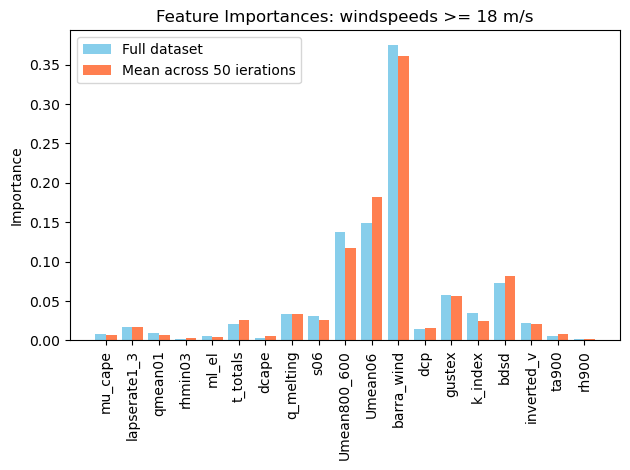

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate


feature_cols = ['mu_cape', 'lapserate1_3', 'qmean01', 'rhmin03', 'ml_el', 't_totals', 
                'dcape', 'q_melting', 's06', 'Umean800_600', 'Umean06', 'barra_wind',
                'dcp', 'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900', 'rh900']

clf = RandomForestClassifier(n_estimators=100, criterion ='entropy', class_weight = 'balanced',
                              max_depth = 3,
                             random_state=42, n_jobs = -1)
#clf.fit(X_train,y_train)
#clf.fit(X_test,y_test)
clf.fit(X,y)
feature_importances_full = clf.feature_importances_



mean_importances = variable_importance_df.mean()
std_dev_importances_cv =  variable_importance_df.std() # Calculate standard deviation


# Plotting feature importances
fig, ax = plt.subplots()
index = np.arange(X.shape[1])  # Numerical index for x-axis
bar_width = 0.4

# Customize colors here
color_full_data = 'skyblue'  # Change color for full data bars
color_cv_mean = 'coral'  

rects1 = ax.bar(index - bar_width/2, feature_importances_full, bar_width, label='Full dataset', color=color_full_data)
rects2 = ax.bar(index + bar_width/2, mean_importances, bar_width, label='Mean across 50 ierations', color=color_cv_mean)

#ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances: windspeeds >= 18 m/s')
ax.set_xticks(index)
ax.set_xticklabels(feature_cols, rotation=90)  # Set feature names with rotation
ax.legend()

plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [77]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 34,              # Default text size
    "axes.titlesize": 34,         # Axes title
    "axes.labelsize": 34,         # Axes x/y labels
    "xtick.labelsize": 34,        # X tick labels
    "ytick.labelsize": 34,        # Y tick labels
    "legend.fontsize": 30,        # Legend
    "figure.titlesize": 34        # Overall figure title
})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


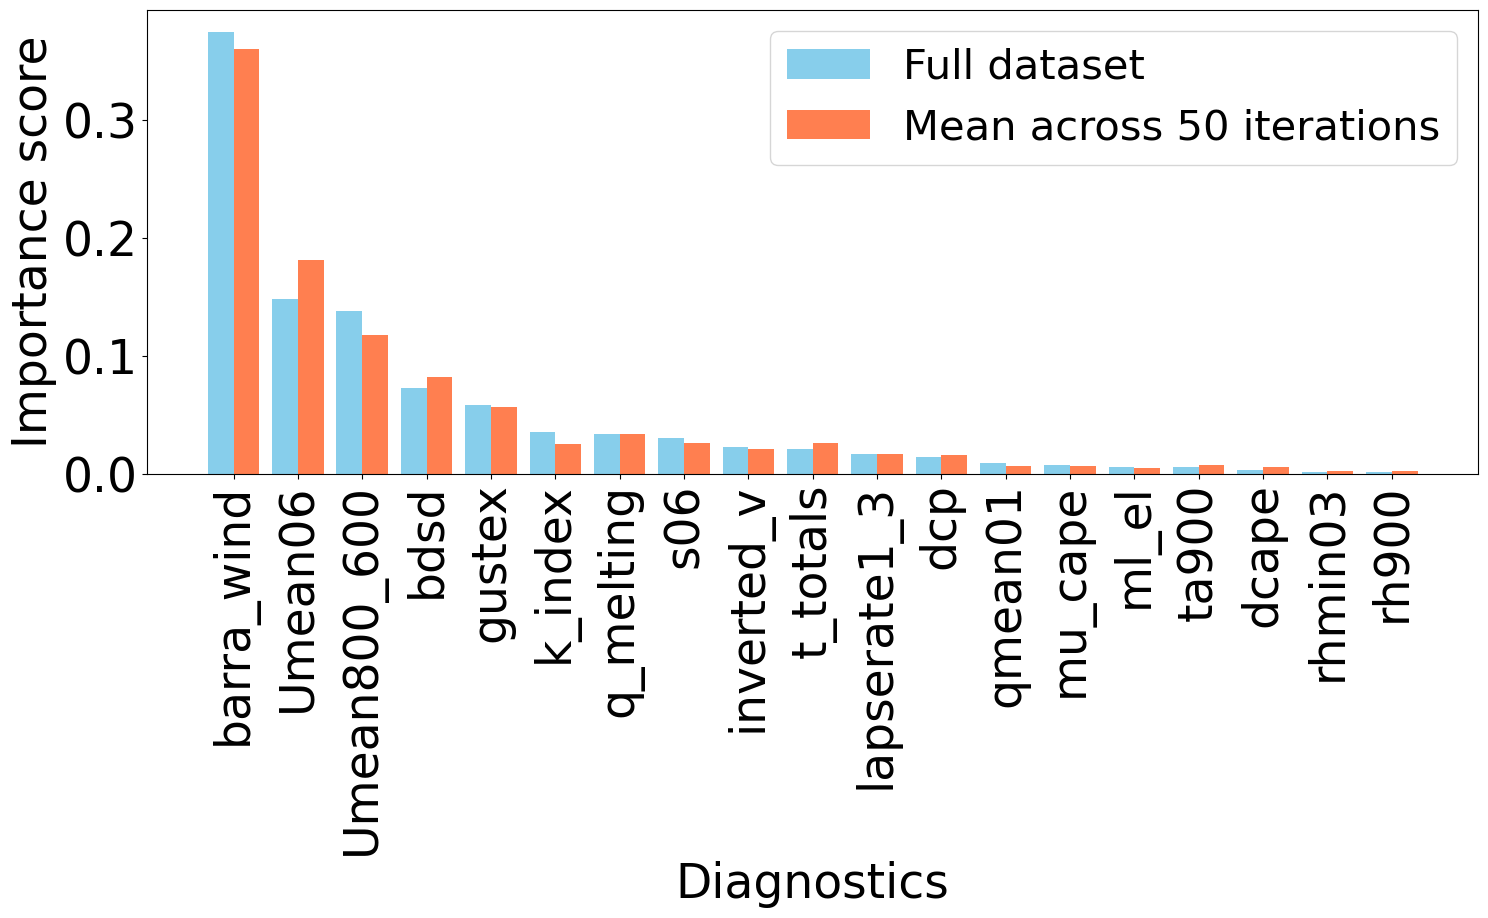

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feature_cols = ['mu_cape', 'lapserate1_3', 'qmean01', 'rhmin03', 'ml_el', 't_totals', 
                'dcape', 'q_melting', 's06', 'Umean800_600', 'Umean06', 'barra_wind',
                'dcp', 'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900', 'rh900']

clf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced',
                             max_depth=3, random_state=42, n_jobs=-1)
clf.fit(X, y)
#clf.fit(X_train,y_train)
feature_importances_full = clf.feature_importances_

mean_importances = variable_importance_df.mean()
std_dev_importances_cv = variable_importance_df.std()

# Sort features by full dataset importance
sorted_indices = np.argsort(feature_importances_full)[::-1]  # descending order

# Reorder all variables accordingly
feature_importances_full_sorted = feature_importances_full[sorted_indices]
mean_importances_sorted = mean_importances.iloc[sorted_indices]
std_dev_sorted = std_dev_importances_cv.iloc[sorted_indices]
feature_cols_sorted = [feature_cols[i] for i in sorted_indices]

# Plotting with sorted features
fig, ax = plt.subplots(figsize=(16, 10))
index = np.arange(len(feature_cols))
bar_width = 0.4

color_full_data = 'skyblue'
color_cv_mean = 'coral'

rects1 = ax.bar(index - bar_width / 2, feature_importances_full_sorted, bar_width,
                label='Full dataset', color=color_full_data)
rects2 = ax.bar(index + bar_width / 2, mean_importances_sorted, bar_width,
                label='Mean across 50 iterations', color=color_cv_mean)

ax.set_ylabel('Importance score')
ax.set_xlabel('Diagnostics')
ax.set_xticks(index)
ax.set_xticklabels(feature_cols_sorted, rotation=90)
ax.legend()

plt.tight_layout()

# Optional: Save high-resolution image
# plt.savefig("feature_importance_sorted.png", dpi=300)

plt.show()


Variable Importances:
 [0.01098516 0.0168937  0.01147467 0.00504153 0.00545719 0.02403184
 0.0082533  0.038983   0.02059478 0.12929319 0.13892639 0.37477671
 0.01930309 0.05131201 0.03246972 0.06714438 0.02605025 0.01233495
 0.00667415]

Negative Importance Indicators:
 [False False False False False False False False False False False False
 False False False False False False False]

No predictors have negative importance values. All predictors provide some degree of predictability.


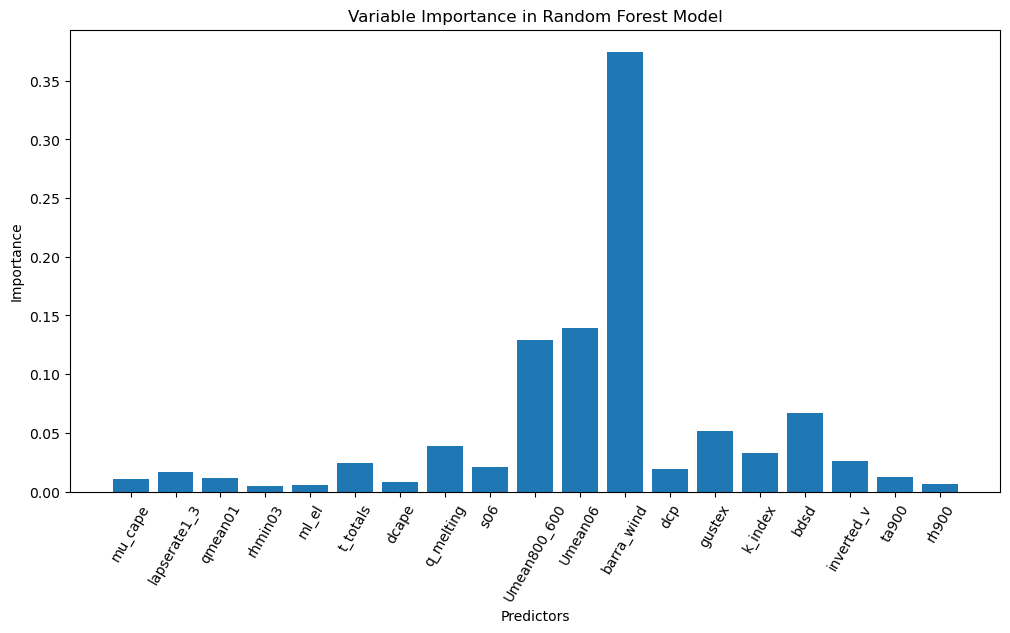

Ranking of predictors based on variable importance:
       Predictor  Variable Importance  Rank
0     barra_wind             0.374777     1
1        Umean06             0.138926     2
2   Umean800_600             0.129293     3
3           bdsd             0.067144     4
4         gustex             0.051312     5
5      q_melting             0.038983     6
6        k_index             0.032470     7
7     inverted_v             0.026050     8
8       t_totals             0.024032     9
9            s06             0.020595    10
10           dcp             0.019303    11
11  lapserate1_3             0.016894    12
12         ta900             0.012335    13
13       qmean01             0.011475    14
14       mu_cape             0.010985    15
15         dcape             0.008253    16
16         rh900             0.006674    17
17         ml_el             0.005457    18
18       rhmin03             0.005042    19


In [68]:
# Calculate variable importance using the Random Forest model
variable_importance = clf.feature_importances_

# Check if any variable importances are negative
negative_importance = variable_importance < 0

# Display variable importances and negative importance indicators
print("Variable Importances:\n", variable_importance)
print("\nNegative Importance Indicators:\n", negative_importance)

# Conclude if predictors with negative importances don't provide any predictability
if np.any(negative_importance):
    print("\nPredictors with negative importance values do not provide any predictability.")
else:
    print("\nNo predictors have negative importance values. All predictors provide some degree of predictability.")


# Create a bar graph of variable importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, variable_importance)
plt.xlabel('Predictors')
plt.xticks(rotation=60)
plt.ylabel('Importance')
plt.title('Variable Importance in Random Forest Model')
plt.show()

# To display the ranking of the predictors
# Get the indices that would sort the variable importance array in descending order
sorted_indices = np.argsort(variable_importance)[::-1]

# Create a DataFrame to display predictors and their rankings
ranking_df = pd.DataFrame({
    'Predictor': X.columns[sorted_indices],
    'Variable Importance': variable_importance[sorted_indices],
    'Rank': np.arange(1, len(X.columns) + 1)
})

# Print the ranking of predictors based on variable importance
print("Ranking of predictors based on variable importance:")
print(ranking_df)

### Cross-Validation

In [69]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10

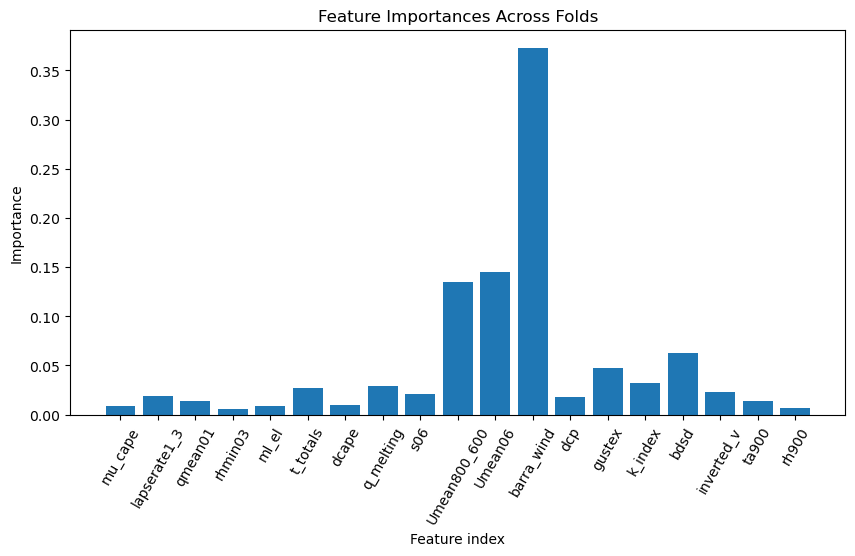

Cross-validated Metrics:
Accuracy: 0.875 ± 0.022
Precision: 0.079 ± 0.012
Recall: 0.816 ± 0.127
F1: 0.144 ± 0.020
Balanced_accuracy: 0.846 ± 0.057


In [70]:
# Setup Stratified K-Fold to maintain class distribution
cv = StratifiedKFold(n_splits=5)

# Custom scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_estimator=True)

# Extract feature importances from each fold
feature_importances = [estimator.feature_importances_ for estimator in cv_results['estimator']]

# Calculating average feature importances across folds
average_importances = np.mean(feature_importances, axis=0)

# Plotting feature importances
plt.figure(figsize=(10, 5))
plt.bar(X.columns, average_importances)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.xticks(rotation=60)
plt.title('Feature Importances Across Folds')
plt.show()

# Displaying metric results
print("Cross-validated Metrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy']:
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.3f} ± {np.std(cv_results['test_' + metric]):.3f}")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10

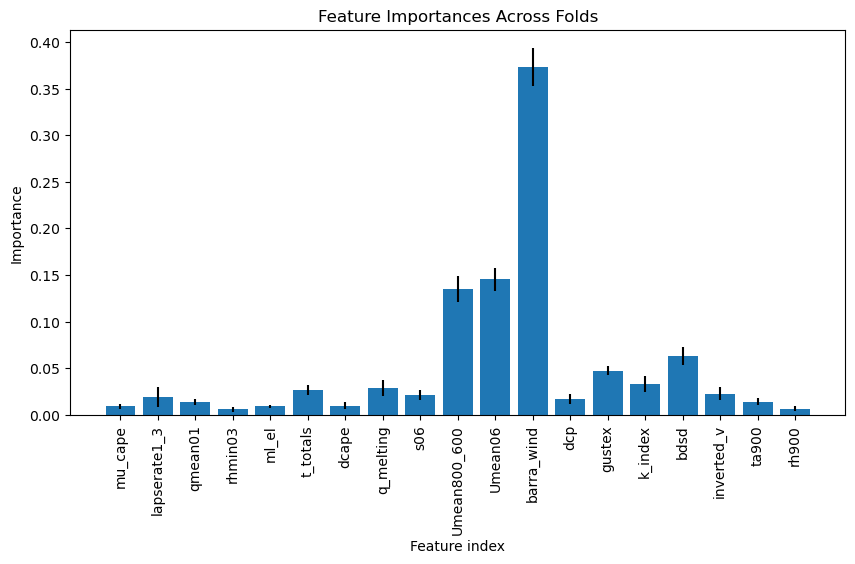

Cross-validated Metrics:
Accuracy: 0.875 ± 0.022
Precision: 0.079 ± 0.012
Recall: 0.816 ± 0.127
F1: 0.144 ± 0.020
Balanced_accuracy: 0.846 ± 0.057

Feature Importance Statistics:
Mean Importances: [0.00896402 0.01912245 0.01338913 0.00590016 0.00906505 0.02669719
 0.00976138 0.0288835  0.02121303 0.13467941 0.14528491 0.37289333
 0.01741499 0.04743832 0.03261141 0.0629335  0.02270468 0.01424675
 0.00679681]
Standard Deviation: [0.00239244 0.01074782 0.00320282 0.0024968  0.00178442 0.00502328
 0.00401993 0.00813305 0.00526094 0.01400485 0.01247553 0.02053705
 0.00545908 0.00505247 0.00853711 0.00976855 0.00697602 0.00356566
 0.00226972]


In [71]:
# Setup Stratified K-Fold to maintain class distribution
cv = StratifiedKFold(n_splits=5)

# Custom scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
cv_results = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_estimator=True)

# Extract feature importances from each fold
feature_importances = [estimator.feature_importances_ for estimator in cv_results['estimator']]

# Calculating average feature importances across folds
average_importances = np.mean(feature_importances, axis=0)
std_dev_importances = np.std(feature_importances, axis=0)

# Plotting feature importances
plt.figure(figsize=(10, 5))
plt.bar(X.columns, average_importances, yerr=std_dev_importances)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances Across Folds')
plt.show()

# Displaying metric results
print("Cross-validated Metrics:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy']:
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.3f} ± {np.std(cv_results['test_' + metric]):.3f}")



# Display feature importance statistics
print("\nFeature Importance Statistics:")
print(f"Mean Importances: {average_importances}")
print(f"Standard Deviation: {std_dev_importances}")

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10

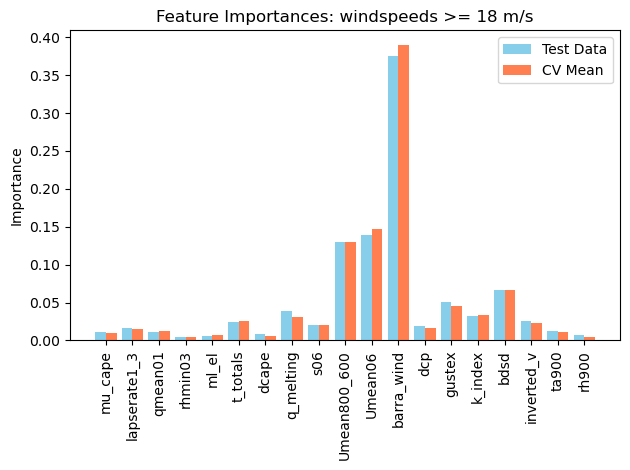

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

feature_cols = ['mu_cape', 'lapserate1_3', 'qmean01', 'rhmin03', 'ml_el', 't_totals', 
                'dcape', 'q_melting', 's06', 'Umean800_600', 'Umean06', 'barra_wind',
                'dcp', 'gustex', 'k_index', 'bdsd', 'inverted_v', 'ta900', 'rh900']

feature_importances_full = clf.feature_importances_

# Setup Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=50)

# Perform cross-validation and return estimators
cv_results = cross_validate(clf, X, y, cv=cv, return_estimator=True, n_jobs=-1)

# Extract feature importances from each fold
feature_importances_cv = np.array([est.feature_importances_ for est in cv_results['estimator']])
mean_importances_cv = np.mean(feature_importances_cv, axis=0)
std_dev_importances_cv = np.std(feature_importances_cv, axis=0)  # Calculate standard deviation


# Plotting feature importances
fig, ax = plt.subplots()
index = np.arange(X.shape[1])  # Numerical index for x-axis
bar_width = 0.4

# Customize colors here
color_full_data = 'skyblue'  # Change color for full data bars
color_cv_mean = 'coral'  

rects1 = ax.bar(index - bar_width/2, feature_importances_full, bar_width, label='Test Data', color=color_full_data)
rects2 = ax.bar(index + bar_width/2, mean_importances_cv, bar_width, label='CV Mean', color=color_cv_mean)

#ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances: windspeeds >= 18 m/s')
ax.set_xticks(index)
ax.set_xticklabels(feature_cols, rotation=90)  # Set feature names with rotation
ax.legend()

plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [73]:
# Assuming you already have predictions and true labels (y_test)
predictions = clf.predict(X_test)  # or using a specific threshold as discussed previously
probabilities = clf.predict_proba(X_test)[:, 1]  # probabilities of the positive class

# Create a DataFrame for analysis
import pandas as pd
data = pd.DataFrame(X_test, columns=['mu_cape',  'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 's06',  'Umean800_600', 
                  'Umean06','dcp', 'wg10','gustex',  'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900'])  # adjust column names
data['True_Label'] = y_test
data['Predicted_Label'] = predictions
data['Probability'] = probabilities


In [74]:
# Filter out the errors
errors = data[(data['Predicted_Label'] != data['True_Label'])]
false_positives = errors[(errors['Predicted_Label'] == 1) & (errors['True_Label'] == 0)]
false_negatives = errors[(errors['Predicted_Label'] == 0) & (errors['True_Label'] == 1)]

# Examine common characteristics of these errors
print("Common features of false positives:")
print(false_positives.describe())

print("Common features of false negatives:")
print(false_negatives.describe())

Common features of false positives:
           mu_cape         lr13      qmean01      rhmin03         ml_el  \
count  2848.000000  2848.000000  2848.000000  2848.000000   2848.000000   
mean    721.905212     7.541500     8.911908    35.300720   6357.098145   
std     835.875977     1.543438     3.099188    17.704935   3557.601074   
min       0.000000     0.611328     1.722656     0.750000    447.125000   
25%      45.953125     6.728271     6.545898    22.065430   3105.000000   
50%     382.906250     7.763184     8.954102    32.750000   6321.937500   
75%    1165.468750     8.713867    11.167236    47.224609   9558.125000   
max    4649.625000    10.178711    18.495117    92.375000  14853.750000   

          t_totals        dcape    q_melting          s06  Umean800_600  ...  \
count  2848.000000  2848.000000  2848.000000  2848.000000   2848.000000  ...   
mean     46.864399   781.351318     3.893370    20.337204     15.415527  ...   
std       5.638882   421.010773     1.476377    

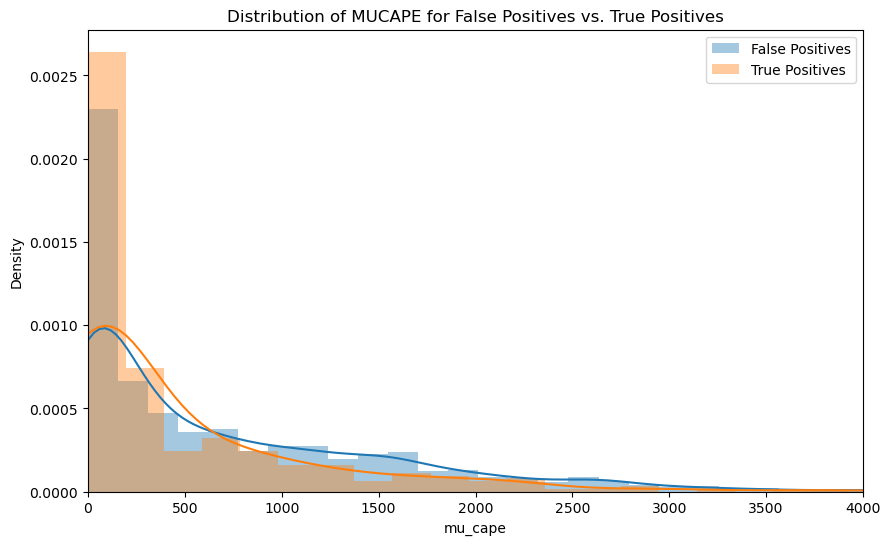

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))

# Plotting the distribution using seaborn
sns.distplot(false_positives['mu_cape'], label='False Positives')
sns.distplot(data[data['True_Label'] == 1]['mu_cape'], label='True Positives')

# Customizing x-ticks and y-ticks
# For x-ticks, you can define a range based on the min and max values of your data or any custom range you prefer
# plt.xticks(ticks=range(int(min(false_positives['mu_cape'].min(), 
#                                 data[data['True_Label'] == 1]['mu_cape'].min())), 
#                        int(max(false_positives['mu_cape'].max(), 
#                                 data[data['True_Label'] == 1]['mu_cape'].max())) + 1, step=5))  # Custom x-ticks with a step of 5

# For y-ticks, you can define them similarly, or just use the default ones
#plt.yticks(ticks=np.linspace(0, plt.gca().get_ylim()[1], num=10))  # Custom y-ticks

# Clipping the plot to only show from 0 to max value for x-axis
#plt.xlim(0, max(false_positives['mu_cape'].max(), data[data['True_Label'] == 1]['mu_cape'].max()))
plt.xlim(0, 4000)

plt.title('Distribution of MUCAPE for False Positives vs. True Positives')
plt.legend()
plt.show()


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Define a directory where the images will be saved
import os
save_dir = '/g/data/up6/gs5098/BARRA_indices_time_series/Strong winds'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it does not exist

# Example: Plotting feature distributions for false positives
for feature in ['mu_cape',  'lr13', 
                  'qmean01', 'rhmin03',  'ml_el', 't_totals',  
                  'dcape', 'q_melting', 's06',  'Umean800_600', 
                  'Umean06','dcp','wg10',  'gustex',  'k_index', 
                  'bdsd', 'inverted_v', 'ta900','rh900']:  # adjust according to your features
    plt.figure(figsize=(10, 6))
    sns.distplot(false_positives[feature], label='False Positives')
    sns.distplot(data[data['True_Label'] == 1][feature], label='True Positives')
    plt.title(f'Distribution of {feature} for False Positives vs. True Positives')
    plt.legend()
    # Save the figure
    file_path = os.path.join(save_dir, f'{feature}_distribution.png')
    plt.savefig(file_path)
    plt.close()  # Close the figure after saving to free up memory


### Confuson matrix for train dataset

First, ensure your Random Forest model is trained on the training dataset. After training the model, use it to make predictions on the same training dataset. This will help you evaluate how well the model has learned from the training data. Using the predictions and the actual labels from the training set, generate the confusion matrix.

In [70]:
# Predict on the training data
y_train_pred = clf.predict(X_train)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[54997  6691]
 [  151   668]]


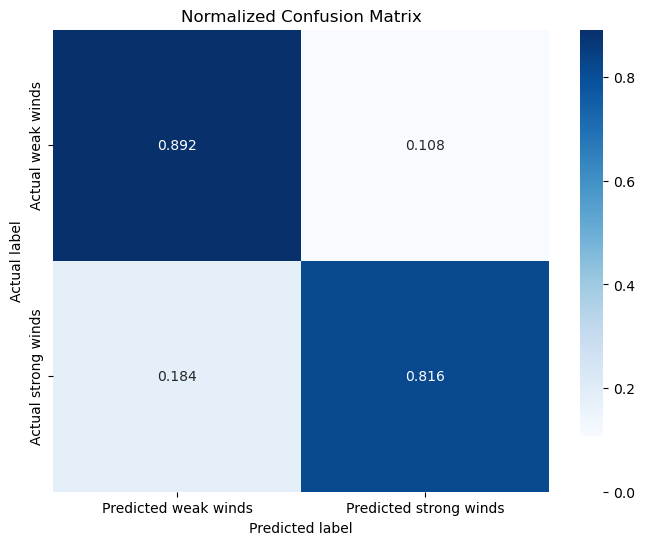

In [71]:
# Step 2: Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 3: Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns_heatmap = sns.heatmap(cm_normalized, annot=True, fmt=".3f", cmap='Blues', 
            xticklabels=['Predicted weak winds', 'Predicted strong winds'], 
            yticklabels=['Actual weak winds', 'Actual strong winds'])

cbar = sns_heatmap.collections[0].colorbar
cbar.set_ticks(np.arange(0, 1, 0.2))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()

## Calculating train scores

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your training data (x_train, y_train) and testing data (x_test, y_test)

# Predict on training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8905402594909371
Testing Accuracy: 0.8906681597611049


### Variable/Feature importances

Variable Importances:
 [0.01122662 0.01886511 0.00852561 0.00502401 0.00741451 0.02295852
 0.00635815 0.03738862 0.02656736 0.12576918 0.15759534 0.33098024
 0.02065323 0.05907679 0.03450372 0.08729948 0.02578085 0.01007934
 0.00393333]

Negative Importance Indicators:
 [False False False False False False False False False False False False
 False False False False False False False]

No predictors have negative importance values. All predictors provide some degree of predictability.


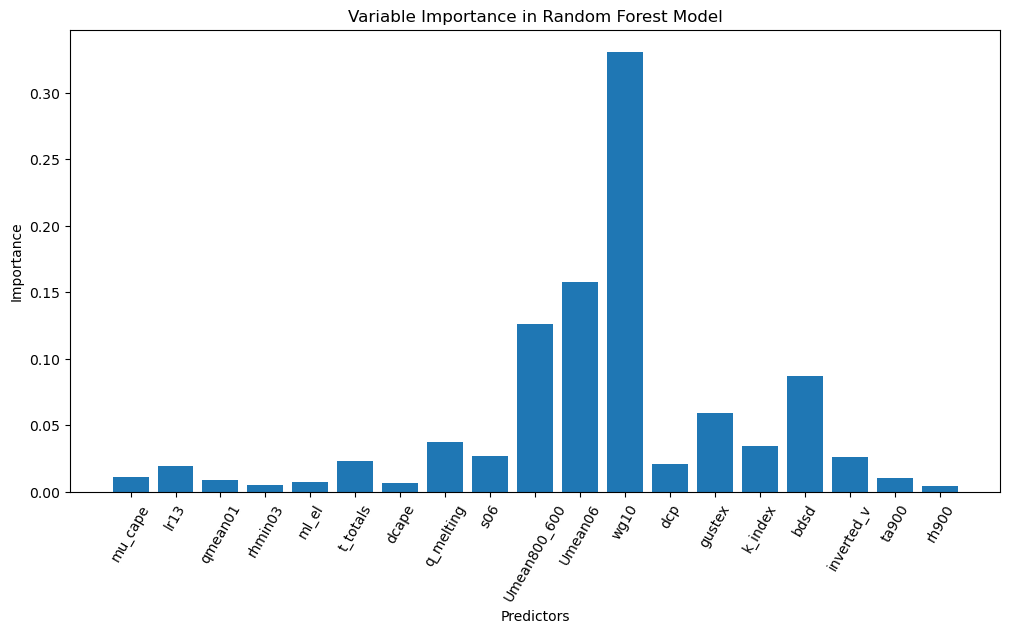

Ranking of predictors based on variable importance:
       Predictor  Variable Importance  Rank
0           wg10             0.330980     1
1        Umean06             0.157595     2
2   Umean800_600             0.125769     3
3           bdsd             0.087299     4
4         gustex             0.059077     5
5      q_melting             0.037389     6
6        k_index             0.034504     7
7            s06             0.026567     8
8     inverted_v             0.025781     9
9       t_totals             0.022959    10
10           dcp             0.020653    11
11          lr13             0.018865    12
12       mu_cape             0.011227    13
13         ta900             0.010079    14
14       qmean01             0.008526    15
15         ml_el             0.007415    16
16         dcape             0.006358    17
17       rhmin03             0.005024    18
18         rh900             0.003933    19


In [73]:
# Calculate variable importance using the Random Forest model
variable_importance = clf.feature_importances_

# Check if any variable importances are negative
negative_importance = variable_importance < 0

# Display variable importances and negative importance indicators
print("Variable Importances:\n", variable_importance)
print("\nNegative Importance Indicators:\n", negative_importance)

# Conclude if predictors with negative importances don't provide any predictability
if np.any(negative_importance):
    print("\nPredictors with negative importance values do not provide any predictability.")
else:
    print("\nNo predictors have negative importance values. All predictors provide some degree of predictability.")


# Create a bar graph of variable importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, variable_importance)
plt.xlabel('Predictors')
plt.xticks(rotation=60)
plt.ylabel('Importance')
plt.title('Variable Importance in Random Forest Model')
plt.show()

# To display the ranking of the predictors
# Get the indices that would sort the variable importance array in descending order
sorted_indices = np.argsort(variable_importance)[::-1]

# Create a DataFrame to display predictors and their rankings
ranking_df = pd.DataFrame({
    'Predictor': X.columns[sorted_indices],
    'Variable Importance': variable_importance[sorted_indices],
    'Rank': np.arange(1, len(X.columns) + 1)
})

# Print the ranking of predictors based on variable importance
print("Ranking of predictors based on variable importance:")
print(ranking_df)


### Training wih different seeds

#### Training Random Forest with different seeds and analysing the variability of the results helps to assess the stability and generalisability of the model, which are crucial aspects of building a reliable machine learning model.
This updated script performs a new train-test split in each iteration and calculates the mean performance metrics across the 20 iterations. This approach provides an even better assessment of the model's stability and generalisability by considering the variability introduced by different splits of the data.

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

Mean Accuracy: 0.890, SD: 0.004
Mean Precision: 0.086, SD: 0.004
Mean Recall: 0.809, SD: 0.012
Mean F1-score: 0.156, SD: 0.007
Mean Balanced Accuracy: 0.850, SD: 0.006


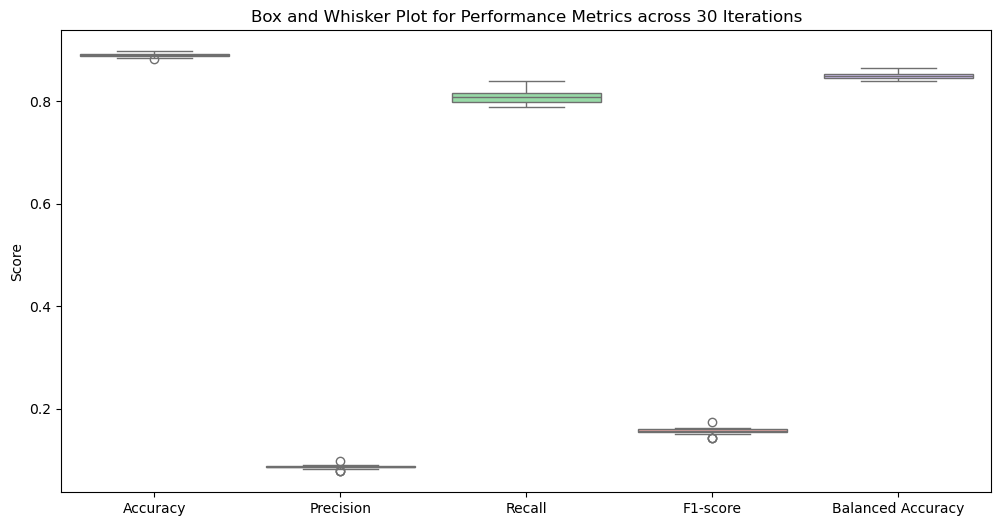

In [74]:
n_iterations = 20
seeds = np.arange(n_iterations)

# Initialize arrays to store performance metrics
accuracy_scores = np.zeros(n_iterations)
precision_scores = np.zeros(n_iterations)
recall_scores = np.zeros(n_iterations)
f1_scores = np.zeros(n_iterations)
balanced_accuracy_scores = np.zeros(n_iterations)

# Train the model and calculate performance metrics for each iteration
for i, seed in enumerate(seeds):
    # Split the data into training and testing sets for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Train the Random Forest model with a different seed
    clf = RandomForestClassifier(n_estimators=400, max_samples = 0.3, 
                                 random_state=seed, 
                                 criterion ='entropy', 
                            class_weight= 'balanced', bootstrap = True,
                             max_depth = 3, n_jobs = -1)
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy_scores[i] = accuracy_score(y_test, y_pred)
    precision_scores[i] = precision_score(y_test, y_pred)
    recall_scores[i] = recall_score(y_test, y_pred)
    f1_scores[i] = f1_score(y_test, y_pred)
    balanced_accuracy_scores[i] = balanced_accuracy_score(y_test, y_pred)

# Calculate the mean and standard deviation of performance metrics
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_balanced_accuracy = np.mean(balanced_accuracy_scores)
std_balanced_accuracy = np.std(balanced_accuracy_scores)

# Display mean and standard deviation of performance metrics
print(f"Mean Accuracy: {mean_accuracy:.3f}, SD: {std_accuracy:.3f}")
print(f"Mean Precision: {mean_precision:.3f}, SD: {std_precision:.3f}")
print(f"Mean Recall: {mean_recall:.3f}, SD: {std_recall:.3f}")
print(f"Mean F1-score: {mean_f1:.3f}, SD: {std_f1:.3f}")
print(f"Mean Balanced Accuracy: {mean_balanced_accuracy:.3f}, SD: {std_balanced_accuracy:.3f}")

# Create a DataFrame to store the performance metrics for each iteration
performance_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores,
    'Balanced Accuracy': balanced_accuracy_scores
})

# Draw a  box and whisker plot to display the results of each performance metric across 30 iterations
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, palette="pastel")
plt.ylabel('Score')
plt.title('Box and Whisker Plot for Performance Metrics across 30 Iterations')
plt.show()

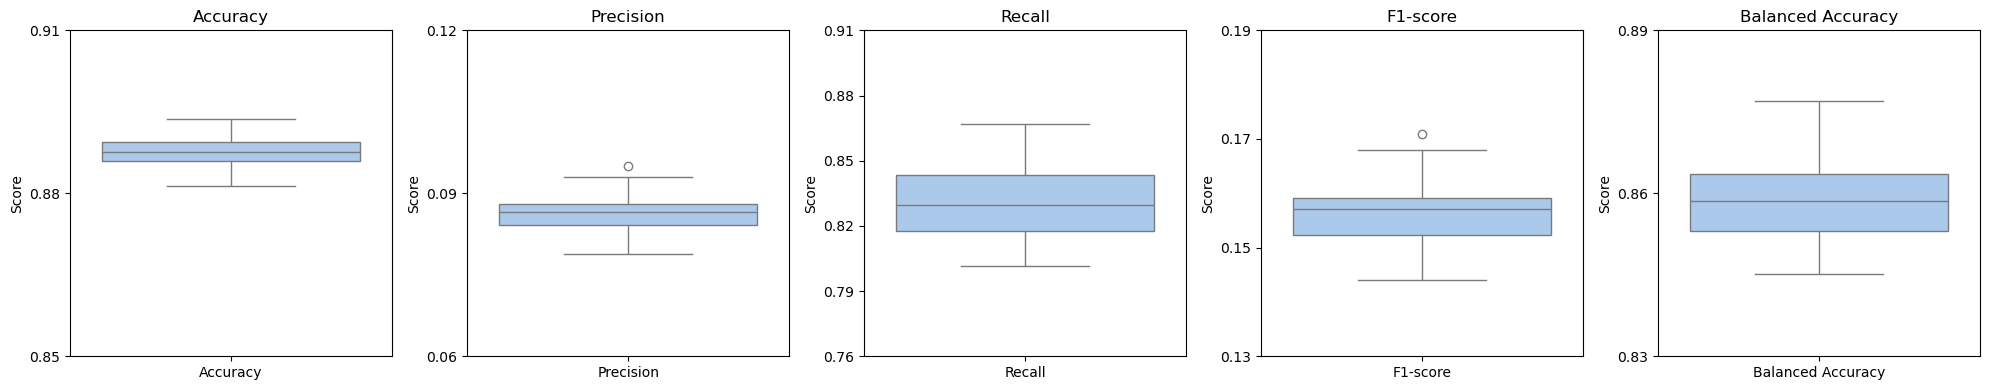

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have already computed the performance_df as you described in your code

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4), sharey=False)  # Turn off sharing y-axis

# Titles for each subplot
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Balanced Accuracy']

# Custom y-ticks for each subplot, you can adjust these based on the range of each metric
yticks = {
    'Accuracy': np.arange(0.85, 0.93,0.03),
    'Precision': np.arange(0.06, 0.13, 0.03),
    'Recall': np.arange(0.76,0.91, 0.03),
    'F1-score': np.arange(0.13,0.20, 0.02),
    'Balanced Accuracy': np.arange(0.83,0.90, 0.03)
}

# Plotting each metric in a separate subplot
for ax, column, title in zip(axes, performance_df.columns, titles):
    sns.boxplot(data=performance_df[[column]], ax=ax, palette="pastel")
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    ax.set_yticks(yticks[title])  # Set custom y-ticks
    ax.set_yticklabels(['{:.2f}'.format(y) for y in yticks[title]])  # Set y-tick labels with custom formatting

# Display the plot
plt.tight_layout()
plt.show()


## Logistic regression model

### Hyperparameter tuning

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Define model
model = LogisticRegression( n_jobs=-1, class_weight='balanced',
                                                           random_state= 42 )

# Define hyperparameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2',  'elasticnet', 'none'],
    'solver': ['liblinear','lbfgs', 'sag', 'saga'],
    'max_iter': [50, 100, 200]# 'liblinear' works well with 'l1' and 'l2'
}

# Setup grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',  n_jobs=-1)

# Perform grid search
grid.fit(X, y)

# Best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-

Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8464571368340291


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Fitting the model to the train dataset and predicting on the test dataset

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight


model = make_pipeline(StandardScaler(), LogisticRegression(C = 1, max_iter=100, penalty = 'l2',
                                                           solver ='liblinear' ,class_weight='balanced', 
                                                           random_state= 42))


# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression model accuracy (in %): {accuracy * 100:.3f}")


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression model accuracy (in %): 86.002


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[22768,  3708],
       [   42,   272]])

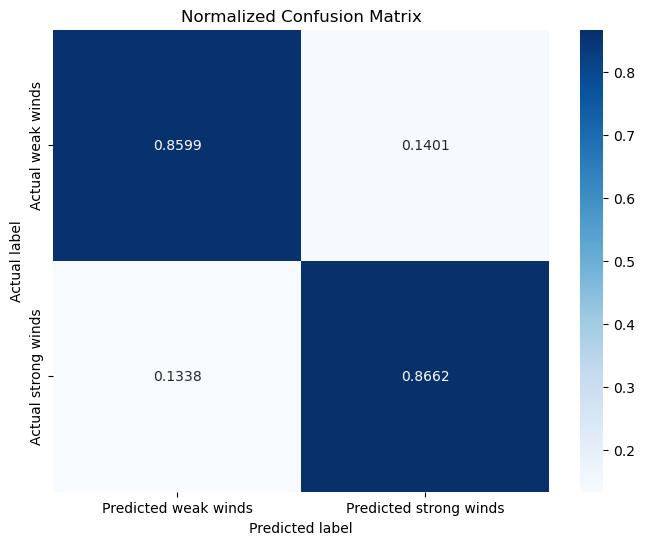

In [76]:
# Step 2: Normalize the confusion matrix
cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# Step 3: Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", cmap='Blues', 
            xticklabels=['Predicted weak winds', 'Predicted strong winds'], 
            yticklabels=['Actual weak winds', 'Actual strong winds'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
lr_predictions = model.predict(X_test)

# Probabilities for ROC-AUC
lr_probs = model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))
print("ROC-AUC:", roc_auc_score(y_test, lr_probs))


Logistic Regression Metrics:
Accuracy: 0.8600223964165733
Precision: 0.06834170854271357
Recall: 0.8662420382165605
F1 Score: 0.12668840242198418
ROC-AUC: 0.9313701244150452


### Cross validation

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np


In [94]:
rf_clf = RandomForestClassifier(n_estimators=400, criterion ='entropy', 
                             bootstrap=True, max_samples = 0.3, class_weight= 'balanced', 
                             random_state=42, max_depth = 3, oob_score = True)

log_reg = LogisticRegression(C = 1, max_iter=100, penalty = 'l2',
                                                           solver ='liblinear' ,class_weight='balanced', 
                                                           random_state= 42)


In [95]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [96]:
# For accuracy
rf_accuracy = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
log_reg_accuracy = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10

In [97]:
print("Random Forest - Accuracy: %0.3f (+/- %0.3f)" % (rf_accuracy.mean(), rf_accuracy.std() * 2))
print("Logistic Regression - Accuracy: %0.3f (+/- %0.3f)" % (log_reg_accuracy.mean(), log_reg_accuracy.std() * 2))


Random Forest - Accuracy: 0.885 (+/- 0.008)
Logistic Regression - Accuracy: 0.859 (+/- 0.006)
